In [1]:
#Importing the relevant packages
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

c:\users\joshu\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [21]:
#Getting the historical data for the 30 stocks
stidf = pd.read_csv('sti.csv')
tickers = stidf['Symbol'].tolist()
names = stidf['Name'].tolist()
df = dr.DataReader(tickers,'yahoo',start = '2019-10-01', end='2020-04-30')['Adj Close']

In [4]:
#Checking that our data is complete without any missing values
df.isna().sum()

Symbols
D05.SI     0
G13.SI     0
Z74.SI     0
U11.SI     0
V03.SI     0
C31.SI     0
O39.SI     0
C38U.SI    0
BS6.SI     0
BN4.SI     0
C61U.SI    0
C09.SI     0
A17U.SI    0
S68.SI     0
T39.SI     0
U14.SI     0
C6L.SI     0
S63.SI     0
F34.SI     0
N2IU.SI    0
M44U.SI    0
Y92.SI     0
J37.SI     0
S58.SI     0
J36.SI     0
C52.SI     0
U96.SI     0
H78.SI     0
D01.SI     0
C07.SI     0
dtype: int64

In [35]:
#Replace tickers with company names
df.columns = stidf['Name'].tolist()

#Some exploratory analysis of the data
df.head()
df.describe()

,DBSGroupHoldings,GentingSingaporePLC,SingaporeTelecom,UnitedOverseasBank,VentureCorporation,CapitaLand,Oversea-ChineseBankingCorp,CapitaMallTrust,YangzijiangShipbuildingHoldings,KeppelCorp,...,MapletreeLogisticsTrust,ThaiBeverages,JardineStrategicHoldingsLtd,SATS,JardineMathesonHoldingsLimited,ComfortDelGroCorporation,SembcorpIndustries,HongkongLandHoldings,DairyFarmInternationalHoldings,JardineCycle&Carriage
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,22.995584,0.851544,3.086674,24.195188,15.253509,3.491007,10.358926,2.310125,0.949584,6.216921,...,1.692608,0.798480,28.658664,4.400013,53.037944,2.028840,1.980054,4.966035,5.206417,27.735973
std,2.754964,0.106435,0.281146,2.792083,0.864747,0.358911,0.958355,0.308289,0.093460,0.565475,...,0.144544,0.103416,3.706622,0.780482,3.173674,0.340646,0.278017,0.557866,0.586264,4.576246
min,16.303734,0.510000,2.280000,17.393238,12.122540,2.570000,7.810000,1.513016,0.749675,4.830904,...,1.225733,0.500000,18.000000,2.580000,43.750000,1.345436,1.470000,3.640000,3.700000,17.010000
25%,20.756355,0.775000,2.900000,21.719276,14.891747,3.450000,9.720000,2.309340,0.902475,5.722613,...,1.618859,0.750000,25.279167,3.960000,51.480000,1.810047,1.626800,4.522642,4.845821,24.139999
50%,24.223797,0.900000,3.194414,25.560242,15.375874,3.650000,10.850000,2.448697,0.940675,6.565327,...,1.670556,0.849409,30.558430,4.772727,53.813122,2.177864,2.067800,5.225094,5.481654,29.889999
75%,24.953526,0.930000,3.300000,26.134405,15.879365,3.710000,11.000000,2.508421,1.012300,6.633920,...,1.779290,0.873958,31.191149,5.009881,55.469807,2.294016,2.214800,5.311698,5.645430,30.590000
max,25.691906,0.960000,3.400000,26.748169,16.537777,3.940000,11.200000,2.594793,1.136450,6.800503,...,1.996759,0.908327,32.812496,5.140000,57.399364,2.361772,2.283400,5.600378,6.165657,33.349998


In [24]:
#Plotting the correlation matrix
corrMatrix = df.corr()
corrMatrix

,DBSGroupHoldings,GentingSingaporePLC,SingaporeTelecom,UnitedOverseasBank,VentureCorporation,CapitaLand,Oversea-ChineseBankingCorp,CapitaMallTrust,YangzijiangShipbuildingHoldings,KeppelCorp,...,MapletreeLogisticsTrust,ThaiBeverages,JardineStrategicHoldingsLtd,SATS,JardineMathesonHoldingsLimited,ComfortDelGroCorporation,SembcorpIndustries,HongkongLandHoldings,DairyFarmInternationalHoldings,JardineCycle&Carriage
DBSGroupHoldings,1.000000,0.944971,0.957218,0.993132,0.731729,0.972638,0.993082,0.922072,0.686489,0.918269,...,0.403554,0.910817,0.980772,0.961908,0.821471,0.929303,0.949523,0.972104,0.801960,0.972791
GentingSingaporePLC,0.944971,1.000000,0.930281,0.948992,0.660734,0.896524,0.933436,0.850325,0.736164,0.881454,...,0.330802,0.964460,0.940424,0.943440,0.761184,0.926459,0.933227,0.942375,0.912280,0.954483
SingaporeTelecom,0.957218,0.930281,1.000000,0.944414,0.743950,0.938289,0.935952,0.857954,0.763893,0.919652,...,0.435176,0.881380,0.950034,0.926089,0.789189,0.893910,0.919893,0.955218,0.784863,0.921404
UnitedOverseasBank,0.993132,0.948992,0.944414,1.000000,0.689930,0.963952,0.992306,0.931731,0.661027,0.895021,...,0.352801,0.922214,0.979574,0.972486,0.823518,0.949590,0.961225,0.976825,0.825115,0.982707
VentureCorporation,0.731729,0.660734,0.743950,0.689930,1.000000,0.789326,0.739739,0.681232,0.605472,0.723310,...,0.810785,0.632012,0.703350,0.597843,0.637217,0.533899,0.549727,0.707402,0.427505,0.640250
CapitaLand,0.972638,0.896524,0.938289,0.963952,0.789326,1.000000,0.974095,0.940606,0.679576,0.888885,...,0.491286,0.872739,0.956663,0.938780,0.801666,0.890823,0.907693,0.958220,0.706586,0.936074
Oversea-ChineseBankingCorp,0.993082,0.933436,0.935952,0.992306,0.739739,0.974095,1.000000,0.941550,0.637501,0.893943,...,0.431736,0.909247,0.976242,0.953122,0.820282,0.925460,0.928948,0.965329,0.783640,0.971201
CapitaMallTrust,0.922072,0.850325,0.857954,0.931731,0.681232,0.940606,0.941550,1.000000,0.470604,0.761034,...,0.402674,0.860871,0.914668,0.918545,0.731978,0.918601,0.863252,0.914447,0.692430,0.935691
YangzijiangShipbuildingHoldings,0.686489,0.736164,0.763893,0.661027,0.605472,0.679576,0.637501,0.470604,1.000000,0.733095,...,0.305694,0.665483,0.669811,0.668962,0.567726,0.589396,0.702454,0.729247,0.659450,0.613261
KeppelCorp,0.918269,0.881454,0.919652,0.895021,0.723310,0.888885,0.893943,0.761034,0.733095,1.000000,...,0.478274,0.823519,0.911172,0.847592,0.804818,0.781751,0.877064,0.862605,0.710690,0.866835


In [25]:
#Using average percentage return of the adjusted closing prices of Q4/2019 & Q1/2020 then extraploate that to a one year period
#Calculate stock volatility -> sqrt(252)*sqrt(variance)
avg_returns = df.pct_change().mean()*252
vol =df.pct_change().std()*sqrt(252) 
data = pd.DataFrame()
data['Avg_Returns'] = avg_returns
data['Volatility'] = vol
data

,Avg_Returns,Volatility
DBSGroupHoldings,-0.305646,0.296050
GentingSingaporePLC,-0.107678,0.458190
SingaporeTelecom,-0.104269,0.319126
UnitedOverseasBank,-0.371708,0.280800
VentureCorporation,0.068117,0.360164
CapitaLand,-0.225107,0.347920
Oversea-ChineseBankingCorp,-0.295755,0.270693
CapitaMallTrust,-0.432870,0.405159
YangzijiangShipbuildingHoldings,0.053715,0.400619
KeppelCorp,0.089378,0.326025


In [29]:
#Since the price ranges for various stocks differs, there is a need for normalization, using MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(data)

#new normalized DataFrame of the constituents
norm_df = pd.DataFrame(norm_data, columns = ['Normalized Avg_Returns', 'Normalized Volatility'], index = names)
norm_df

,Normalized Avg_Returns,Normalized Volatility
DBSGroupHoldings,0.554357,0.104387
GentingSingaporePLC,0.686734,0.771871
SingaporeTelecom,0.689013,0.199381
UnitedOverseasBank,0.510183,0.041606
VentureCorporation,0.804284,0.368323
CapitaLand,0.608212,0.317920
Oversea-ChineseBankingCorp,0.560971,0.000000
CapitaMallTrust,0.469285,0.553554
YangzijiangShipbuildingHoldings,0.794653,0.534865
KeppelCorp,0.818500,0.227785


Text(0, 0.5, 'Sum of squared errors')

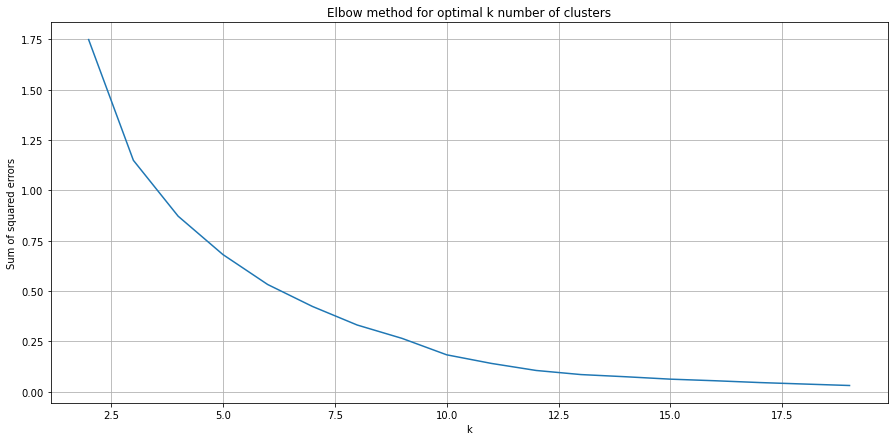

In [32]:
#Using elbow method to determine optimal number of clusters for our model
sum_sq_errors = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(norm_df)
    sum_sq_errors.append(km.inertia_)

#Plotting the results to identify ideal n number of clusters
fig = plt.figure(figsize=(15, 7))
plt.plot(range(2, 20), sum_sq_errors)
plt.grid(True)
plt.title('Elbow method for optimal k number of clusters')
plt.xlabel('k')
plt.ylabel('Sum of squared errors')

In [34]:
#Reduction in SSE tapers off at around 10, which will be our number of centroids
#Creating a KMeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

#Creating a pipeline with the kmeans function, then fitting our normalized data
pipeline = make_pipeline(kmeans)
pipeline.fit(norm_df)

#predicting the labels
labels = pipeline.predict(norm_df)

#printing result
result = pd.DataFrame({'Company':list(norm_df.index),'Labels':labels}).sort_values(by = 'Labels', axis=0)
result

,Company,Labels
20,MapletreeLogisticsTrust,0
21,ThaiBeverages,1
24,JardineMathesonHoldingsLimited,1
7,CapitaMallTrust,1
17,SingaporeTechnologiesEngineering,2
15,UOLGroup,2
2,SingaporeTelecom,2
13,SingaporeExchange,2
9,KeppelCorp,2
22,JardineStrategicHoldingsLtd,3
